In [ ]:
import os
import cv2
import random
import numpy as np
import pandas as pd
from PIL import Image
from skimage import exposure
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/Potato-Leaf-Dataset/archive.zip'
extract_dir = '/content/drive/MyDrive/Potato-Leaf-Dataset/extracted'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


In [ ]:
train_dir = '/content/drive/MyDrive/Potato-Leaf-Dataset/extracted/PLD_3_Classes_256/Training'
val_dir = '/content/drive/MyDrive/Potato-Leaf-Dataset/extracted/PLD_3_Classes_256/Validation'
test_dir = '/content/drive/MyDrive/Potato-Leaf-Dataset/extracted/PLD_3_Classes_256/Testing'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(128, 128), batch_size=32, class_mode='categorical'
)

print(train_generator.class_indices)

val_generator = val_test_datagen.flow_from_directory(
    val_dir, target_size=(128, 128), batch_size=32, class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir, target_size=(128, 128), batch_size=32, class_mode='categorical', shuffle=False
)

Found 3251 images belonging to 3 classes.
{'Early_Blight': 0, 'Healthy': 1, 'Late_Blight': 2}
Found 416 images belonging to 3 classes.
Found 405 images belonging to 3 classes.


In [ ]:
model = Sequential([

    # Block 1
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Block 2
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.30),

    # Block 3
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.35),

    # Block 4
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.40),

    # Dense layers
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=val_generator
)


Epoch 1/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 71s 474ms/step - accuracy: 0.4901 - loss: 1.4448 - val_accuracy: 0.2452 - val_loss: 7.9861
Epoch 2/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 28s 274ms/step - accuracy: 0.5805 - loss: 1.0607 - val_accuracy: 0.2452 - val_loss: 10.5811
Epoch 3/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 28s 277ms/step - accuracy: 0.6566 - loss: 0.8284 - val_accuracy: 0.2452 - val_loss: 10.2032
Epoch 4/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 31s 302ms/step - accuracy: 0.7320 - loss: 0.6700 - val_accuracy: 0.2452 - val_loss: 4.4618
Epoch 5/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 37s 262ms/step - accuracy: 0.8243 - loss: 0.4805 - val_accuracy: 0.2716 - val_loss: 4.2443
Epoch 6/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 27s 264ms/step - accuracy: 0.8254 - loss: 0.4468 - val_accuracy: 0.5529 - val_loss: 1.5822
Epoch 7/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 27s 267ms/step - accuracy: 0.8521 - loss: 0.3846 - val_accuracy: 0.7452 - val_loss: 0.6596
Epoch 8/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 27s 266ms/step - accuracy: 0.8895

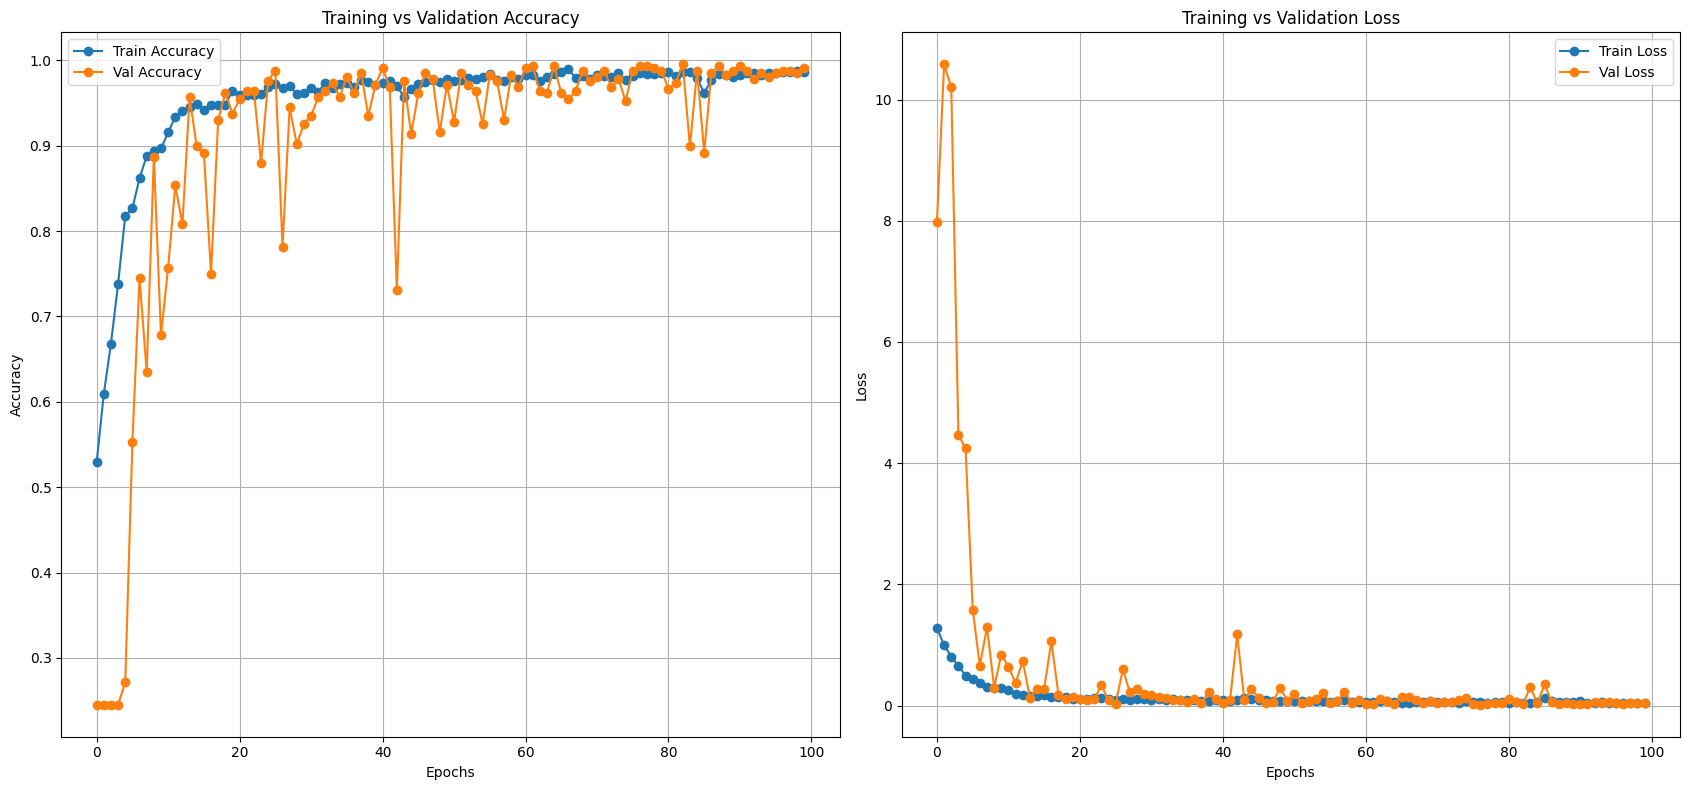

In [ ]:
plt.figure(figsize=(17, 8))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc*100:.2f}%")


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 252ms/step - accuracy: 0.9919 - loss: 0.0344
Test Accuracy: 99.01%


Found 405 images belonging to 3 classes.
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 197ms/step


<Figure size 800x600 with 0 Axes>

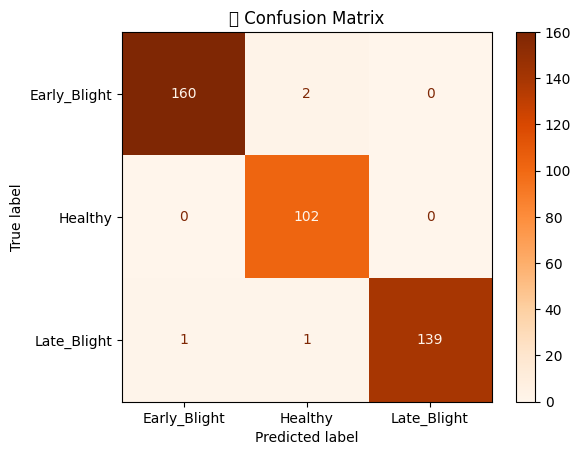

📋 Classification Report:
              precision    recall  f1-score   support

Early_Blight       0.99      0.99      0.99       162
     Healthy       0.97      1.00      0.99       102
 Late_Blight       1.00      0.99      0.99       141

    accuracy                           0.99       405
   macro avg       0.99      0.99      0.99       405
weighted avg       0.99      0.99      0.99       405



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

test_generator = val_test_datagen.flow_from_directory(
    test_dir, target_size=(128, 128), batch_size=32, class_mode='categorical', shuffle=False
)

y_prob = model.predict(test_generator)
y_pred = np.argmax(y_prob, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Oranges, values_format='d')
plt.title("📊 Confusion Matrix")
plt.grid(False)
plt.show()

print("📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


In [ ]:
model.save('potato_disease_model.h5')

In [ ]:
from google.colab import files
files.download('potato_disease_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>